In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration

In [298]:
df = pd.read_csv(r'C:\Users\AANCHAL\Desktop\ExcelR\Assignments\Logistic Regression\diabetes (1).csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [299]:
df.shape

(768, 9)

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [301]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [302]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [303]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [304]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

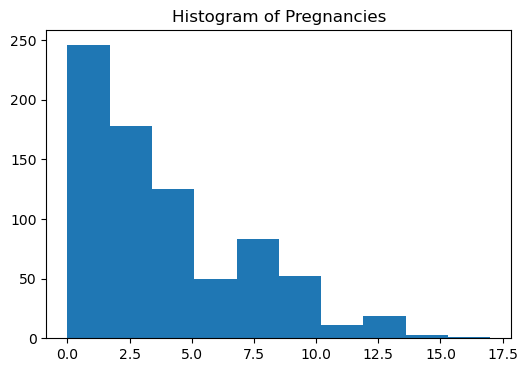

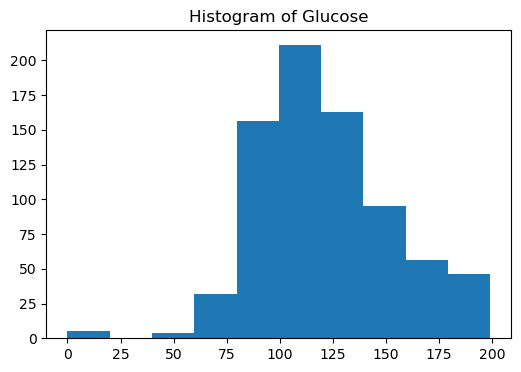

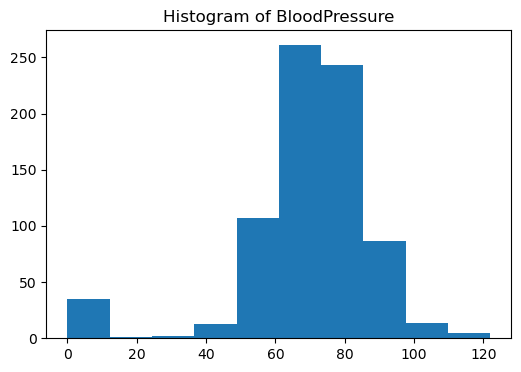

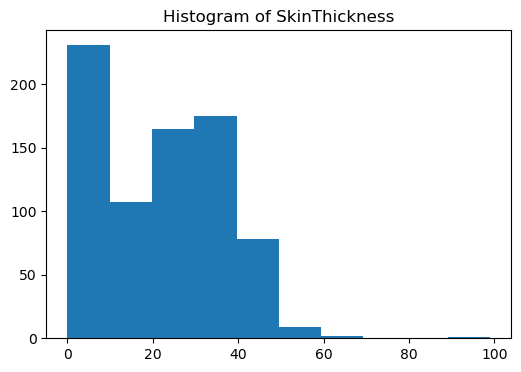

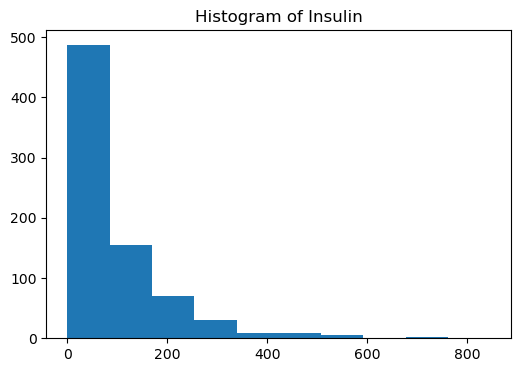

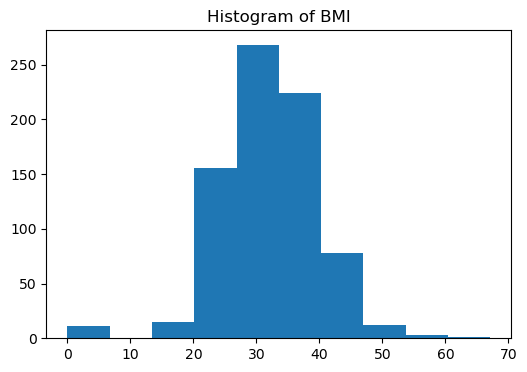

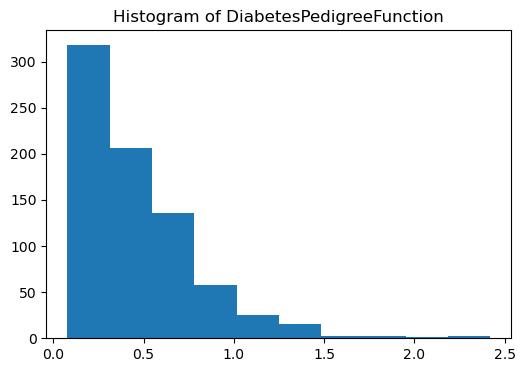

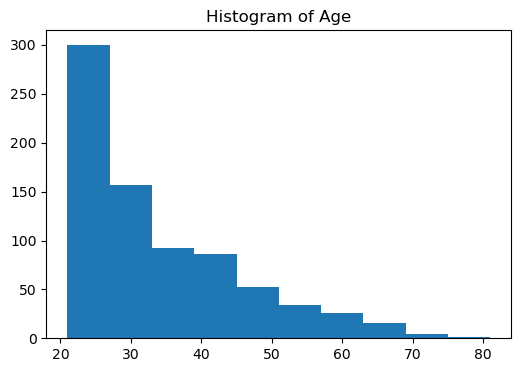

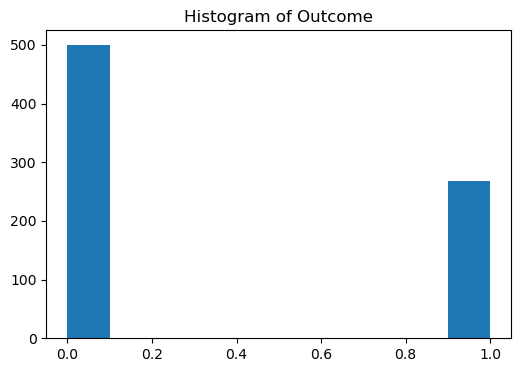

In [305]:
for i in df.columns:
    plt.figure(figsize=(6,4))
    plt.hist(df[i])
    plt.title(f'Histogram of {i}')
    plt.show()

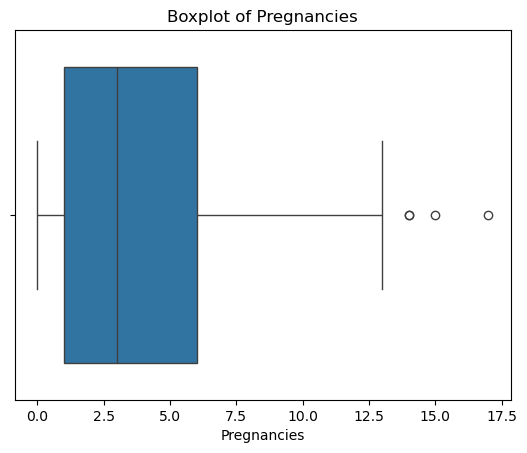

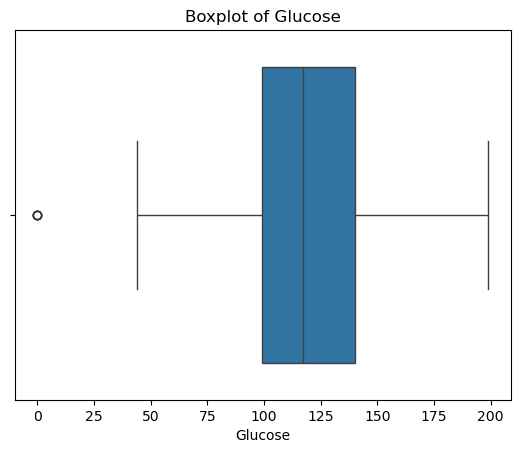

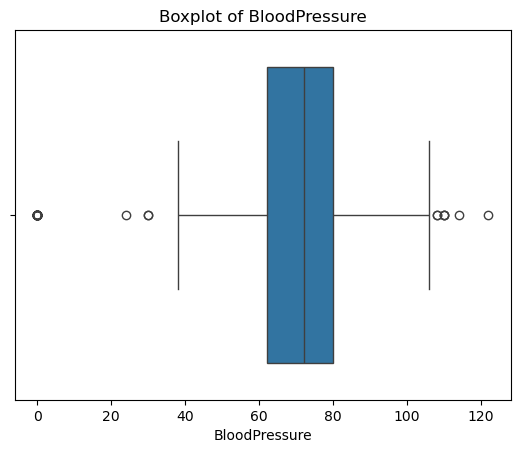

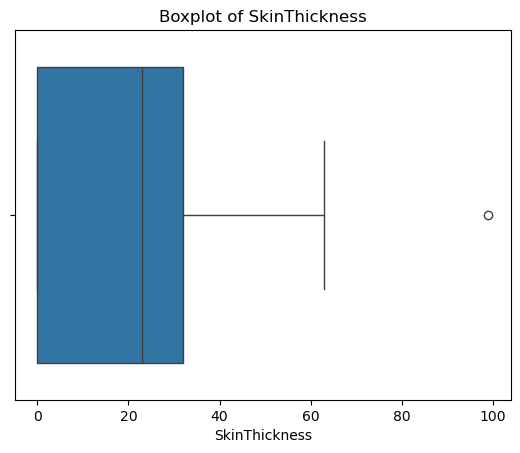

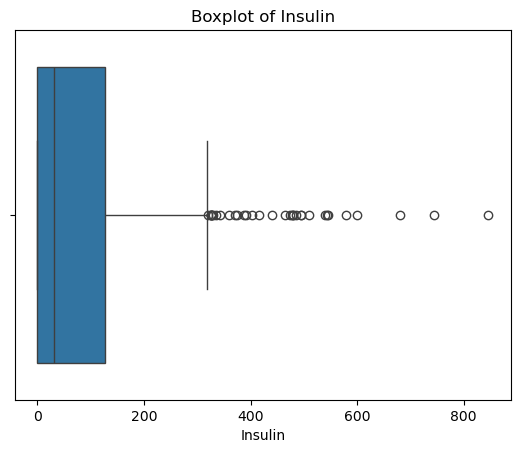

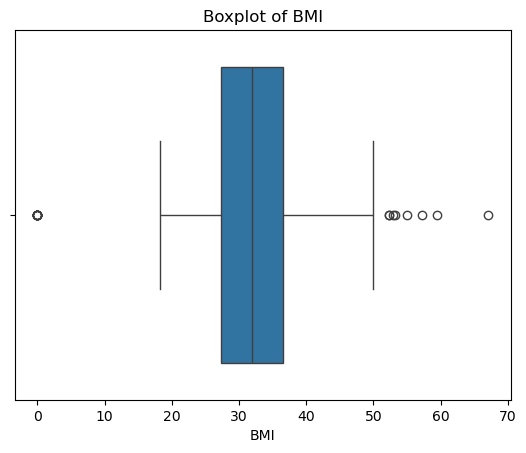

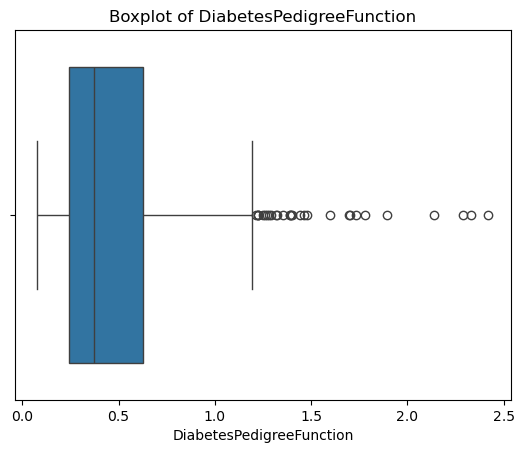

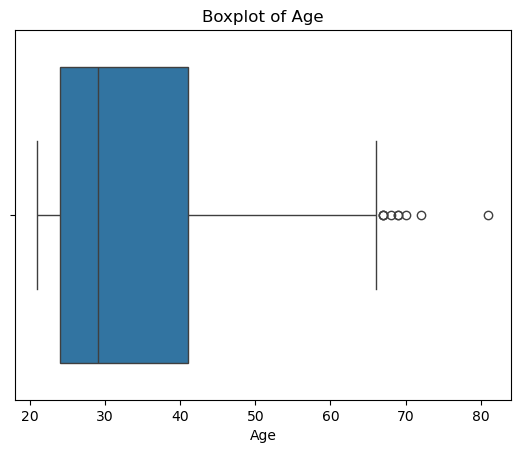

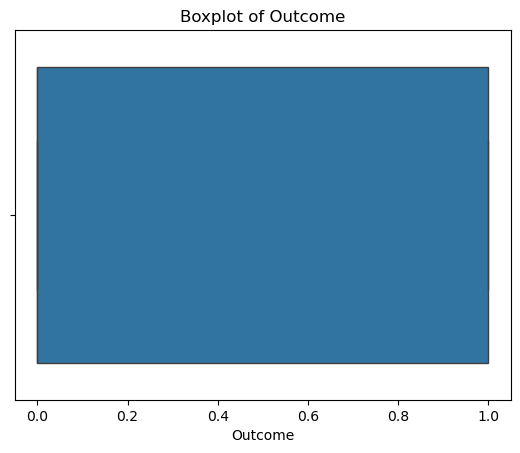

In [306]:
for i in df.columns:
    sns.boxplot(x=df[i])
    plt.title(f'Boxplot of {i}')
    plt.show()

All of these values are medically possible

These extreme cases actually indicate severe diabetes risk

Removing them destroys the model’s ability to detect severe patients


Even if not sure we can make two models and measure its acc score and decide its better with outliers or without

In [307]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Glucose is far ahead of everything else

BMI, Age also matter

Pregnancies matters, but less than age or BMI

Insulin looks important biologically but is statistically weak due to bad data quality

# Data Preprocessing

In [308]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Here there are no null values and no categorical columns to encode so will process further

# Model Building

In [310]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

In [311]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [312]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [313]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [314]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [315]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
668,0,0
324,0,0
624,0,0
690,0,0
473,0,0
...,...,...
355,1,1
534,0,0
344,0,0
296,1,0


In [316]:
# Probabilities for the positive class
y_proba = model.predict_proba(x_test)[:, 1]
# lower threshold to increase sensitivity
y_pred_threshold = (y_proba >= 0.3).astype(int)


In [317]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred_threshold)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')


Accuracy: 0.7532467532467533
Precision: 0.6491228070175439
Recall: 0.7636363636363637
F1 Score: 0.6607142857142857
ROC AUC Score: 0.7353535353535354


In [318]:
y_train_pred1 = model.predict(x_train)
y_test_pred1 = model.predict(x_test)

from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train, y_train_pred1)
print("Training Accuracy:", train_acc)
test_acc = accuracy_score(y_test, y_test_pred1)
print("Testing Accuracy:", test_acc)

Training Accuracy: 0.7703583061889251
Testing Accuracy: 0.7532467532467533


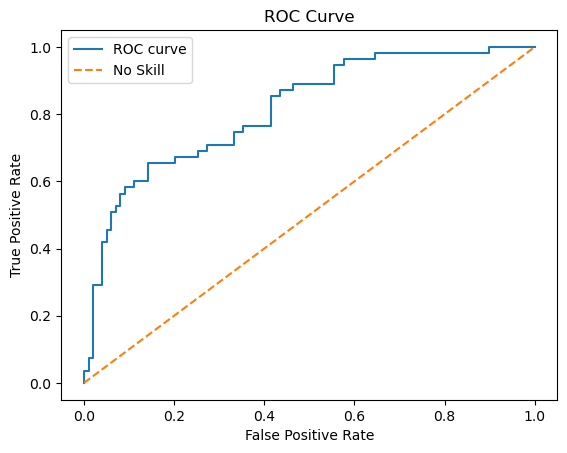

In [319]:
y_pred_proba = model.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)


plt.plot(fpr, tpr, label = 'ROC curve')
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Now lets build the model again but this time by removing outlier

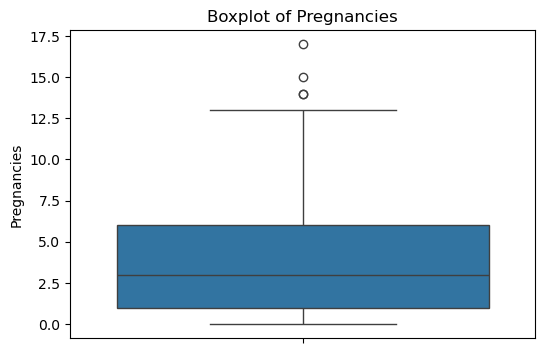

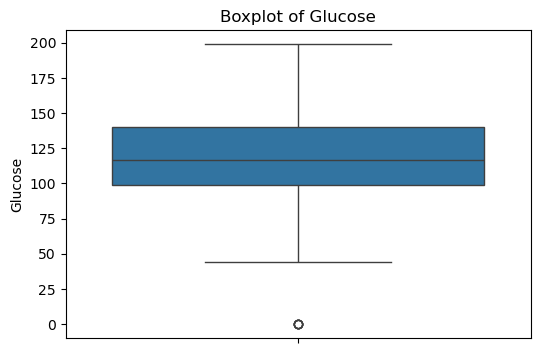

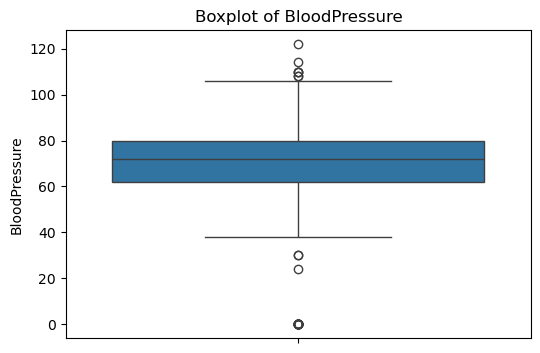

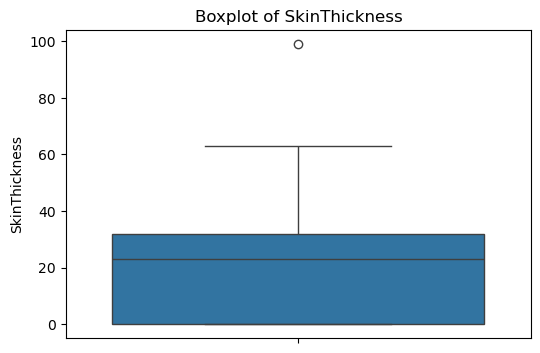

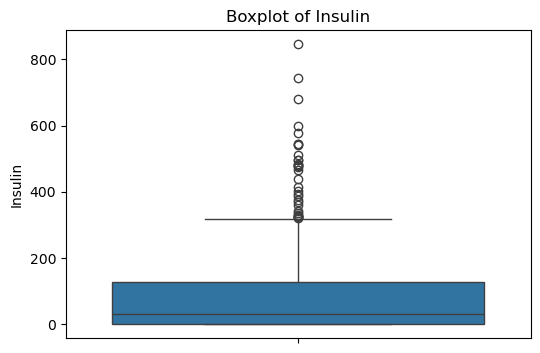

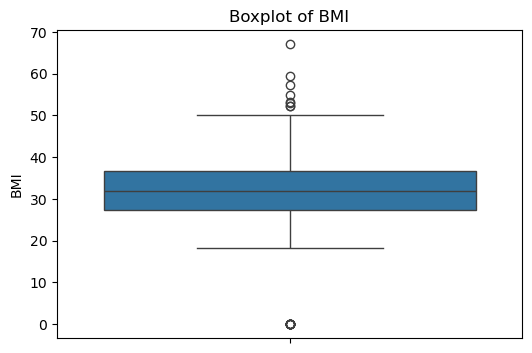

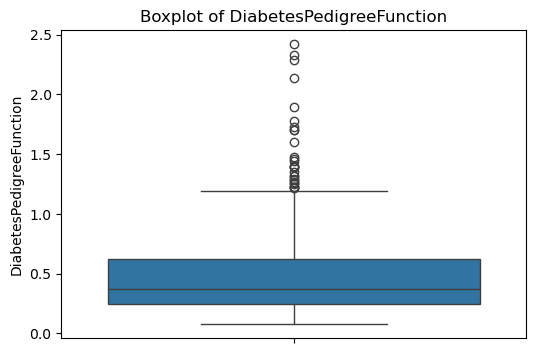

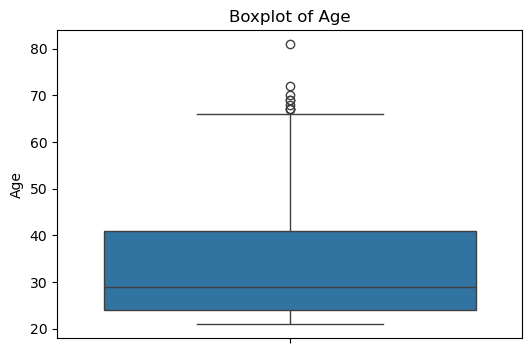

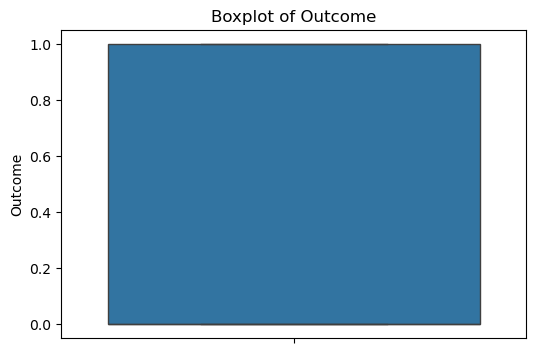

In [320]:
for i in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(df[i])
    plt.title(f'Boxplot of {i}')
    plt.show()

In [321]:
for i in df.columns:
    lower = df[i].quantile(0.05)
    upper = df[i].quantile(0.95)
    df[i] = df[i].clip(lower, upper)

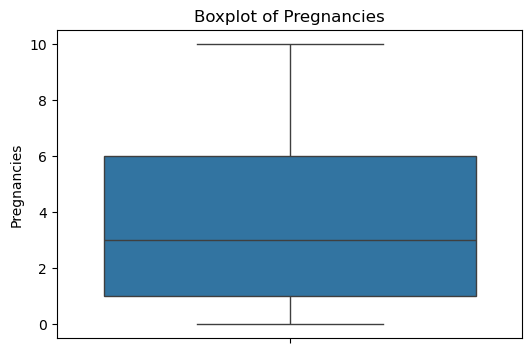

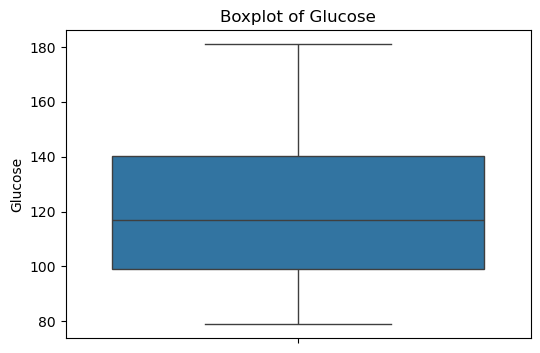

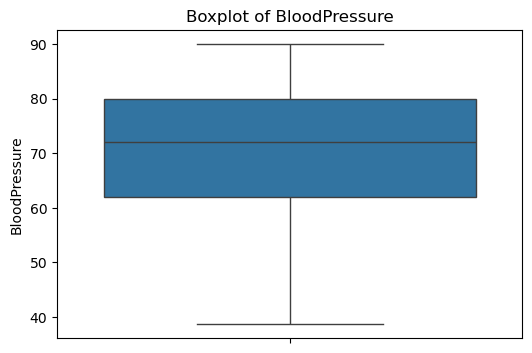

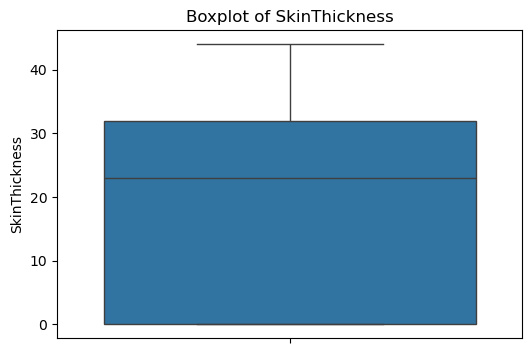

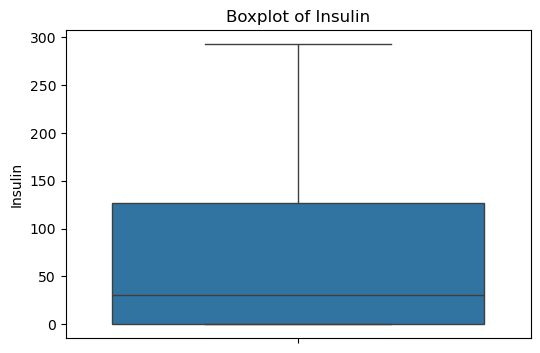

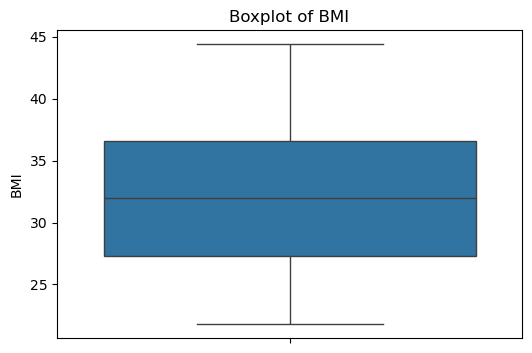

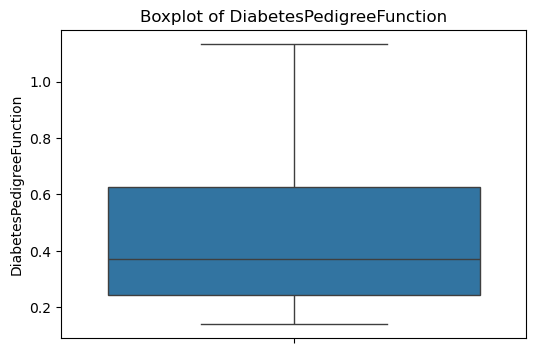

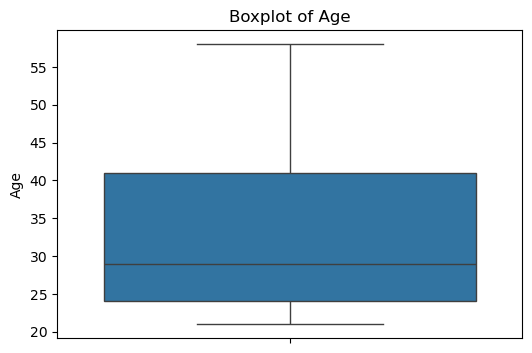

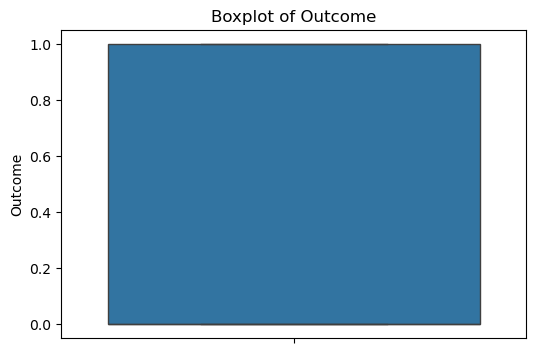

In [322]:
for i in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(df[i])
    plt.title(f'Boxplot of {i}')
    plt.show()

In [323]:
x1 = df.drop('Outcome', axis=1)
y1 = df['Outcome']

from sklearn.model_selection import train_test_split, KFold
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
x_train1 = scaler1.fit_transform(x_train1)
x_test1 = scaler1.transform(x_test1)

In [324]:
model1 = LogisticRegression()
model1.fit(x_train1, y_train1)


y_pred1 = model1.predict(x_test1)
y_pred1


pd.DataFrame({'Actual': y_test1, 'Predicted': y_pred1})

,Actual,Predicted
668,0,0
324,0,0
624,0,0
690,0,0
473,0,0
...,...,...
355,1,1
534,0,0
344,0,1
296,1,0


In [325]:
# Probabilities for the positive class
y_proba1 = model1.predict_proba(x_test)[:, 1]
# lower threshold to increase sensitivity
y_pred_threshold1 = (y_proba1 >= 0.3).astype(int)

In [331]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

accuracy = accuracy_score(y_test1, y_pred1)
precision = precision_score(y_test1, y_pred1)
recall = recall_score(y_test1, y_pred_threshold1)
f1 = f1_score(y_test1, y_pred1)
roc_auc = roc_auc_score(y_test1, y_pred1)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')


Accuracy: 0.7532467532467533
Precision: 0.6545454545454545
Recall: 0.7636363636363637
F1 Score: 0.6545454545454545
ROC AUC Score: 0.7313131313131312


In [327]:
y_train_pred1 = model.predict(x_train1)
y_test_pred1 = model.predict(x_test1)

from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train1, y_train_pred1)
print("Training Accuracy:", train_acc)
test_acc = accuracy_score(y_test1, y_test_pred1)
print("Testing Accuracy:", test_acc)



Training Accuracy: 0.7736156351791531
Testing Accuracy: 0.7467532467532467


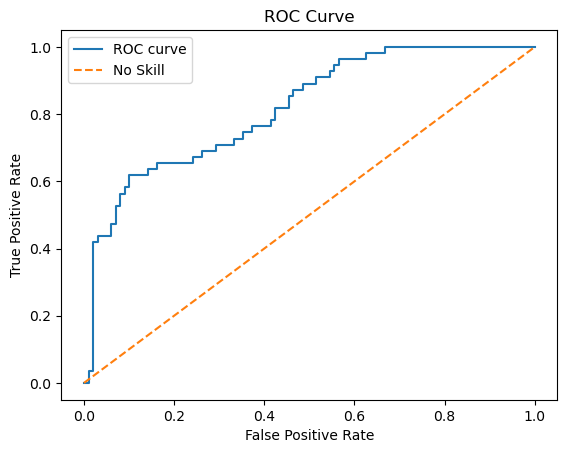

In [328]:
y_pred_proba1 = model.predict_proba(x_test1)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test1, y_pred_proba1)


plt.plot(fpr, tpr, label = 'ROC curve')
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

As we observed the with the outliers the model was not performing that  good as compared to the model without outliers.

so we choose the without outlier one

# Interpretation

In logistic the coefficients represent the effect of each feature on the target outcome

In [329]:
coeff = model.coef_[0]
odds_ratios = np.exp(coeff)
pd.DataFrame({'Feature': x1.columns, 'Coefficient': coeff, 'Odds Ratio': odds_ratios})

,Feature,Coefficient,Odds Ratio
0,Pregnancies,0.212554,1.236833
1,Glucose,1.071301,2.919176
2,BloodPressure,-0.247826,0.780495
3,SkinThickness,0.045729,1.046790
4,Insulin,-0.200783,0.818090
5,BMI,0.778182,2.177510
6,DiabetesPedigreeFunction,0.230625,1.259386
7,Age,0.421207,1.523800


b. Significance of features in predicting diabetes

Most significant features:

- Glucose → strongest predictor: High glucose levels are the main factor in determining diabetes. This feature has the biggest impact on the model’s prediction.

- BMI → important contributor: Higher BMI increases the risk of diabetes, making it another strong factor in the prediction.

- Age → moderate effect: Older individuals have a higher chance of developing diabetes, so age contributes moderately to the prediction.

Moderately significant features:

- Pregnancies → slight effect: The number of pregnancies slightly increases the probability of diabetes, but it’s not as strong as glucose or BMI.

- DiabetesPedigreeFunction → moderate effect: This feature indicates family history and genetic risk, contributing moderately to the prediction.

Less significant features:

- BloodPressure → minor negative effect: Higher blood pressure slightly reduces the prediction probability in the model, but its effect is small.

- SkinThickness → minimal effect: This feature has a very small impact on predicting diabetes.

- Insulin → minor negative effect: Insulin levels have a small effect and do not contribute significantly to the prediction.

In [330]:
import joblib
joblib.dump(model1, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

# Deployment


Its in the app.py file